#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
### Lección 5 -  Entrenando Redes Neuronales Profundas parte I






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = keras.utils.get_file('auto-mpg.data', 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

32768/30286 [================================] - 0s 5us/step


In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print(dataset)

      MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0    18.0          8         307.0  ...          12.0          70       1
1    15.0          8         350.0  ...          11.5          70       1
2    18.0          8         318.0  ...          11.0          70       1
3    16.0          8         304.0  ...          12.0          70       1
4    17.0          8         302.0  ...          10.5          70       1
..    ...        ...           ...  ...           ...         ...     ...
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[398 rows x 8 columns]


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
x = np.asanyarray(dataset.drop(columns=['MPG']))
y = np.asanyarray(dataset[['MPG']])
x = StandardScaler().fit_transform(x)
print(x.shape)
print(y.shape)

(392, 9)
(392, 1)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,
                                                random_state=0)

In [ ]:
def build_model():

  model = keras.Sequential()
  model.add(keras.layers.Dense(128, kernel_initializer='glorot_uniform', 
                               activation='relu', input_shape=[x.shape[1]]))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dense(1, activation='linear'))

  model.compile(loss='mean_squared_error',
                optimizer=keras.optimizers.Adam())
  return  model


In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xtrain, ytrain,
                    batch_size=150, epochs=3000, 
                    validation_split=0.2, verbose=1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
2/2 [==============================] - 0s 19ms/step - loss: 22.0077 - val_loss: 27.7191
Epoch 502/3000
2/2 [==============================] - 0s 16ms/step - loss: 21.2348 - val_loss: 27.6290
Epoch 503/3000
2/2 [==============================] - 0s 15ms/step - loss: 21.3415 - val_loss: 27.5361
Epoch 504/3000
2/2 [==============================] - 0s 15ms/step - loss: 20.9740 - val_loss: 27.4428
Epoch 505/3000
2/2 [==============================] - 0s 18ms/step - loss: 21.4466 - val_loss: 27.3511
Epoch 506/3000
2/2 [==============================] - 0s 14ms/step - loss: 21.0028 - val_loss: 27.2611
Epoch 507/3000
2/2 [==============================] - 0s 15ms/step - loss: 20.1527 - val_loss: 27.1749
Epoch 508/3000
2/2 [==============================] - 0s 17ms/step - loss: 21.6758 - val_loss: 27.0939
Epoch 509/3000
2/2 [==============================] - 0s 15ms/step - loss: 21.0890 - val_loss: 27.0123
Epoch 510/3000
2/2 [=

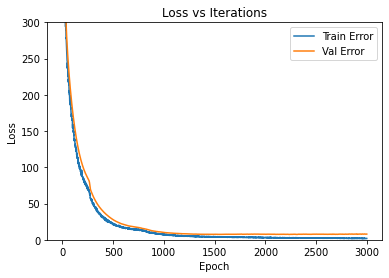

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.title('Loss vs Iterations')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,300])
  plt.legend()

plot_history(history)

In [ ]:
score = model.evaluate(xtest, ytest)

3/3 [==============================] - 0s 2ms/step - loss: 7.9842


Epoch 1/3000
2/2 [==============================] - 0s 34ms/step - loss: 592.1242 - val_loss: 623.4442
Epoch 2/3000
2/2 [==============================] - 0s 14ms/step - loss: 581.2153 - val_loss: 610.4339
Epoch 3/3000
2/2 [==============================] - 0s 16ms/step - loss: 573.7546 - val_loss: 597.6027
Epoch 4/3000
2/2 [==============================] - 0s 14ms/step - loss: 552.1819 - val_loss: 584.9013
Epoch 5/3000
2/2 [==============================] - 0s 17ms/step - loss: 553.5897 - val_loss: 572.3660
Epoch 6/3000
2/2 [==============================] - 0s 15ms/step - loss: 546.0450 - val_loss: 559.9091
Epoch 7/3000
2/2 [==============================] - 0s 15ms/step - loss: 530.8165 - val_loss: 547.5398
Epoch 8/3000
2/2 [==============================] - 0s 15ms/step - loss: 514.2559 - val_loss: 535.2136
Epoch 9/3000
2/2 [==============================] - 0s 18ms/step - loss: 510.4335 - val_loss: 523.0175
Epoch 10/3000
2/2 [==============================] - 0s 14ms/step - loss:

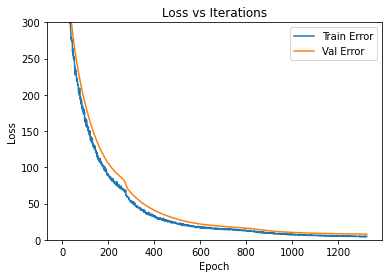

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20)
model = build_model()
history = model.fit(xtrain, ytrain,
                    batch_size=150, epochs=3000, 
                    validation_split=0.2, verbose=1, callbacks=[es])
plot_history(history)
score = model.evaluate(xtest, ytest)